In [7]:
import os, os.path as osp
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from glob import glob
import cv2

from src.common.files import get_raw_paths, get_processed_path
from src.visualization.render_mp4 import unpickle_data

In [9]:
base_path = Path("/data/scratch-oc40/pulkitag/ankile/furniture-data/")
os.environ["DATA_DIR_RAW"] = str(base_path)

raw_paths = get_raw_paths(
    controller="diffik",
    domain="sim",
    demo_outcome="success",
    demo_source="teleop",
    randomness="med",
    task="one_leg_render_demos_brighter",
)

len(raw_paths)

Found the following paths:
    /data/scratch-oc40/pulkitag/ankile/furniture-data/raw/diffik/sim/one_leg_render_demos_brighter/teleop/med/**/success/*.pkl*


26

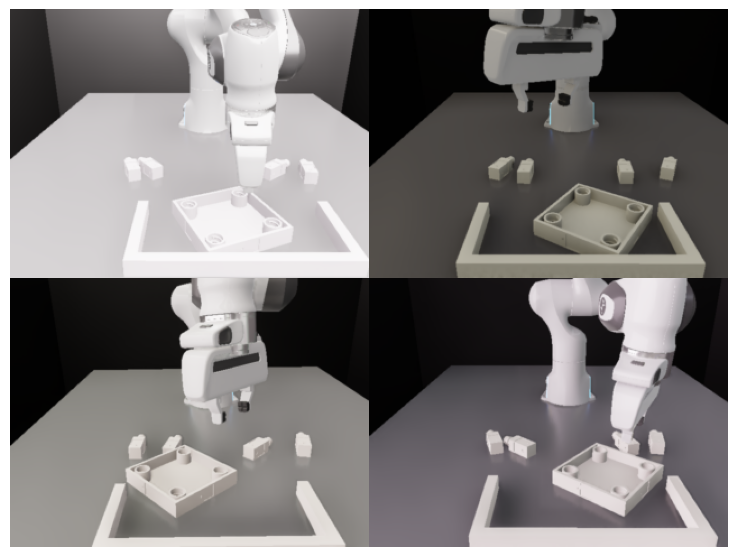

In [30]:
inds = [10, 10, 12, 11]
pths = raw_paths[:4]
imgs = []
for i, pth in enumerate(pths):
    data = unpickle_data(pth)
    img = data["observations"][inds[i]]["color_image2"]
    imgs.append(img)

sz = np.array([13.25, 9.975]) * 0.7
fig, axs = plt.subplots(2, 2, figsize=sz)
for i, ax in enumerate(axs.flat):
    ax.imshow(imgs[i])
    ax.axis("off")

# Remove whitespace between subplots
plt.subplots_adjust(wspace=0, hspace=0)